In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
print(os.getcwd())


C:\Users\Acer\crop_recommendation_system


In [11]:

df = pd.read_csv(r'C:\Users\Acer\crop_recommendation_system\crop_recommendation.csv', encoding="latin1")


In [12]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [13]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [14]:
df.size

17600

In [15]:
df.shape

(2200, 8)

In [16]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [19]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

<Axes: >

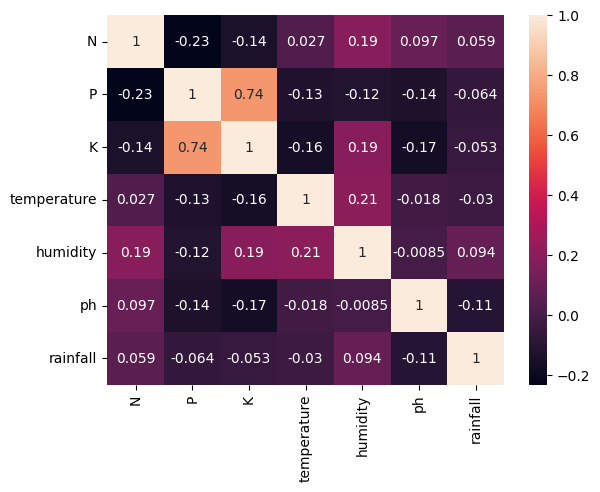

In [22]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

### Seperating features and target label

In [23]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [24]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [25]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [29]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [31]:
import pickle
import os

# Get the absolute path of the current script or notebook
current_dir = os.path.abspath(os.getcwd())

# Ensure 'models' folder exists in the current directory
models_dir = os.path.join(current_dir, "models")
os.makedirs(models_dir, exist_ok=True)

# Define full path to save model
DT_pkl_filename = os.path.join(models_dir, "DecisionTree.pkl")

# Save the model
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

print(f"✅ Model saved successfully to: {DecisionTree}")


✅ Model saved successfully to: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)


# Guassian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [33]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [34]:
import pickle
import os

# Define the folder and ensure it exists
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the path for the Naive Bayes classifier pickle file
NB_pkl_filename = os.path.join(models_dir, 'NBClassifier.pkl')

# Save the model as a pickle file
with open(NB_pkl_filename, 'wb') as NB_Model_pkl:
    pickle.dump(NaiveBayes, NB_Model_pkl)

# Print the filename where the model was saved
print(f"✅ Naive Bayes model saved successfully to: {NB_pkl_filename}") # Changed NBClassifier to NB_pkl_filename

✅ Naive Bayes model saved successfully to: models\NBClassifier.pkl


# Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [36]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [37]:
#Saving trained SVM model

In [38]:
import pickle
import os

# Define the folder and ensure it exists
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the path for the SVM classifier pickle file
SVM_pkl_filename = os.path.join(models_dir, 'SVMClassifier.pkl')

# Save the SVM model as a pickle file
with open(SVM_pkl_filename, 'wb') as SVM_Model_pkl:
    pickle.dump(SVM, SVM_Model_pkl)

print(f"✅ SVM model saved successfully to: {SVM_pkl_filename}")


✅ SVM model saved successfully to: models\SVMClassifier.pkl


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [41]:
import pickle
import os

# Ensure 'models' folder exists
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the correct filename for Logistic Regression model
LR_pkl_filename = os.path.join(models_dir, 'LogisticRegression.pkl')

# Save the Logistic Regression model as a pickle file
with open(LR_pkl_filename, 'wb') as LR_Model_pkl:
    pickle.dump(LogReg, LR_Model_pkl)

print(f"✅ Logistic Regression model saved successfully to: {LR_pkl_filename}")


✅ Logistic Regression model saved successfully to: models\LogisticRegression.pkl


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [43]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [44]:
import pickle
import os

# Ensure 'models' folder exists
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the path for the Random Forest model pickle file
RF_pkl_filename = os.path.join(models_dir, 'RandomForest.pkl')

# Save the Random Forest model as a pickle file
with open(RF_pkl_filename, 'wb') as RF_Model_pkl:
    pickle.dump(RF, RF_Model_pkl)

print(f"✅ Random Forest model saved successfully to: {RF_pkl_filename}")


✅ Random Forest model saved successfully to: models\RandomForest.pkl


# XGBoost

In [53]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training target labels and transform them
Ytrain_encoded = le.fit_transform(Ytrain)

# Initialize and train the XGBoost classifier with the encoded labels
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded) # Use the encoded labels for training

# Make predictions (you'll need to encode the test labels as well for evaluation)
predicted_values = XB.predict(Xtest)

# To get the original labels back, use inverse_transform:
predicted_labels = le.inverse_transform(predicted_values)

# Evaluate the model using the original labels
x = metrics.accuracy_score(Ytest, predicted_labels) # Compare with original labels
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_labels)) # Use original labels for report

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [54]:
# Cross validation score (XGBoost) using encoded target
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target labels and transform them
target_encoded = le.fit_transform(target)  # Encode the entire target

# Now use target_encoded in cross_val_score
score = cross_val_score(XB, features, target_encoded, cv=5)

print(score)

[0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]


### Saving trained XGBoost model

In [55]:
import pickle
import os

# Ensure 'models' folder exists
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the path for the XGBoost model pickle file
XB_pkl_filename = os.path.join(models_dir, 'XGBoost.pkl')

# Save the XGBoost model as a pickle file
with open(XB_pkl_filename, 'wb') as XB_Model_pkl:
    pickle.dump(XB, XB_Model_pkl)

print(f"✅ XGBoost model saved successfully to: {XB_pkl_filename}")


✅ XGBoost model saved successfully to: models\XGBoost.pkl


## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

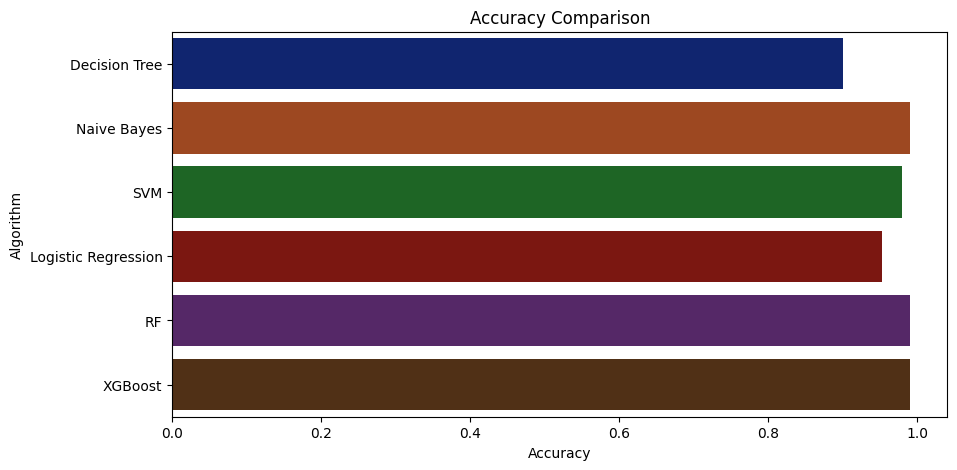

In [56]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [57]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.990909090909091


## Making a prediction

In [58]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [59]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
